# Exploratory Analysis:

- Upload pickled tables
- Retain only synonymous changes SNPs
- Calculate the average phyloP and PhastCons for every codon change
- Calculate the frequency of each codon change
- Calculate the Spearman correlation between the phyloP (or PhastCons) and the frequency

In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from exploratory_analyses import make_score_counts_data, plot_codon_change_frequency_vs_scores, plot_scores

In [10]:
# Unpickling a DataFrame
%cd ../results/tables/

with open('dgrp2_rooted_table.pkl', 'rb') as file:
    dgrp2_combined_df = pickle.load(file)


with open('dpgp3_rooted_table.pkl', 'rb') as file:
    dpgp3_combined_df = pickle.load(file)

/Users/tur92196/Library/Caches/pypoetry/virtualenvs/prf-ratios-syn-sG78pUWQ-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


[Errno 2] No such file or directory: '../results/tables/'
/Users/tur92196/WorkDir/PRF_Ratios_syn/results/tables


In [11]:
# Making the values explicitly float for phyloP and PhastCons scores
dgrp2_combined_df['phyloP'] = pd.to_numeric(dgrp2_combined_df['phyloP'], errors='coerce')
dgrp2_combined_df['phastCons'] = pd.to_numeric(dgrp2_combined_df['phastCons'], errors='coerce')
# print(dgrp2_combined_df.dtypes)

dpgp3_combined_df['phyloP'] = pd.to_numeric(dpgp3_combined_df['phyloP'], errors='coerce')
dpgp3_combined_df['phastCons'] = pd.to_numeric(dpgp3_combined_df['phastCons'], errors='coerce')
# print(dpgp3_combined_df.dtypes)

In [12]:
# Filter for synonymous mutations
dgrp2_synonymous_df = dgrp2_combined_df[dgrp2_combined_df['maineffect'] == 'SYNONYMOUS_CODING']

dpgp3_synonymous_df = dpgp3_combined_df[dpgp3_combined_df['maineffect'] == 'SYNONYMOUS_CODING']

In [24]:
# Prepare the data for ploting
dgrp2_stats = make_score_counts_data(dgrp2_synonymous_df)

dpgp3_stats = make_score_counts_data(dpgp3_synonymous_df)

Spearman's rank correlation coefficient (phyloP): 0.3959500489487601
P-value (phyloP): 2.1849195092544495e-06
Spearman's rank correlation coefficient (phastCons): 0.6987537173524331
P-value (phastCons): 6.174647497999304e-21
Combined plot saved as ../exploratory/phylop_phastcons_codon_density_20240625_152256.png


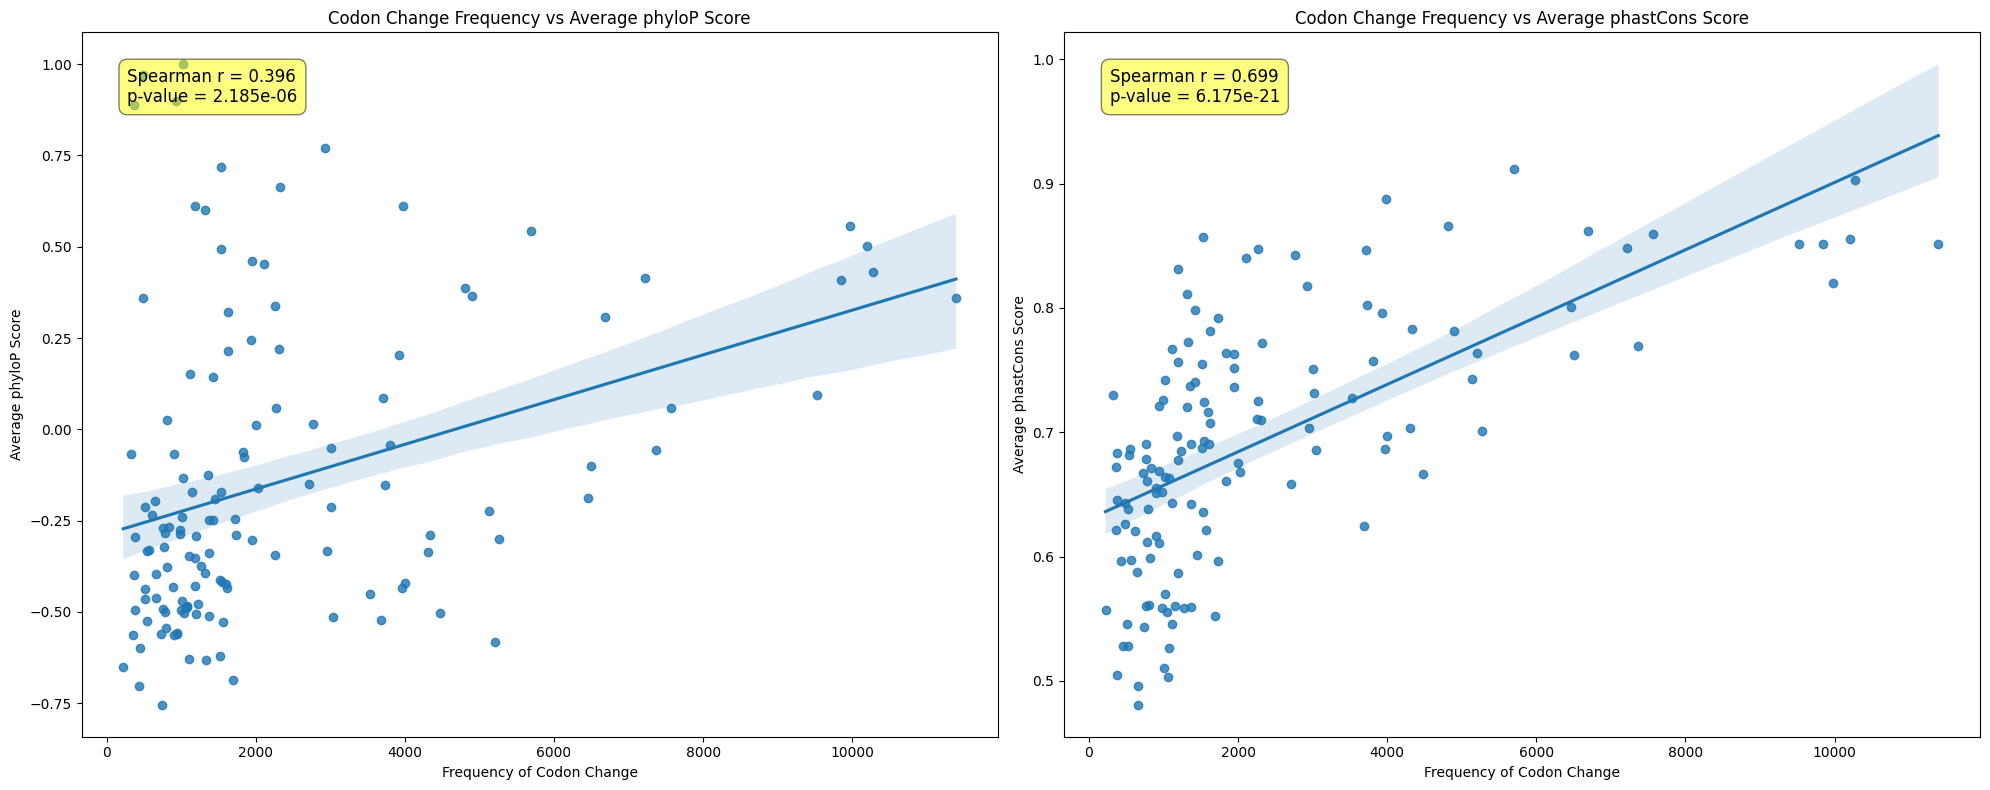

Spearman's rank correlation coefficient (phyloP): 0.40517998244073755
P-value (phyloP): 1.0896441989997243e-06
Spearman's rank correlation coefficient (phastCons): 0.7113062140278997
P-value (phastCons): 4.1632968735728993e-22
Combined plot saved as ../exploratory/phylop_phastcons_codon_density_20240625_152257.png


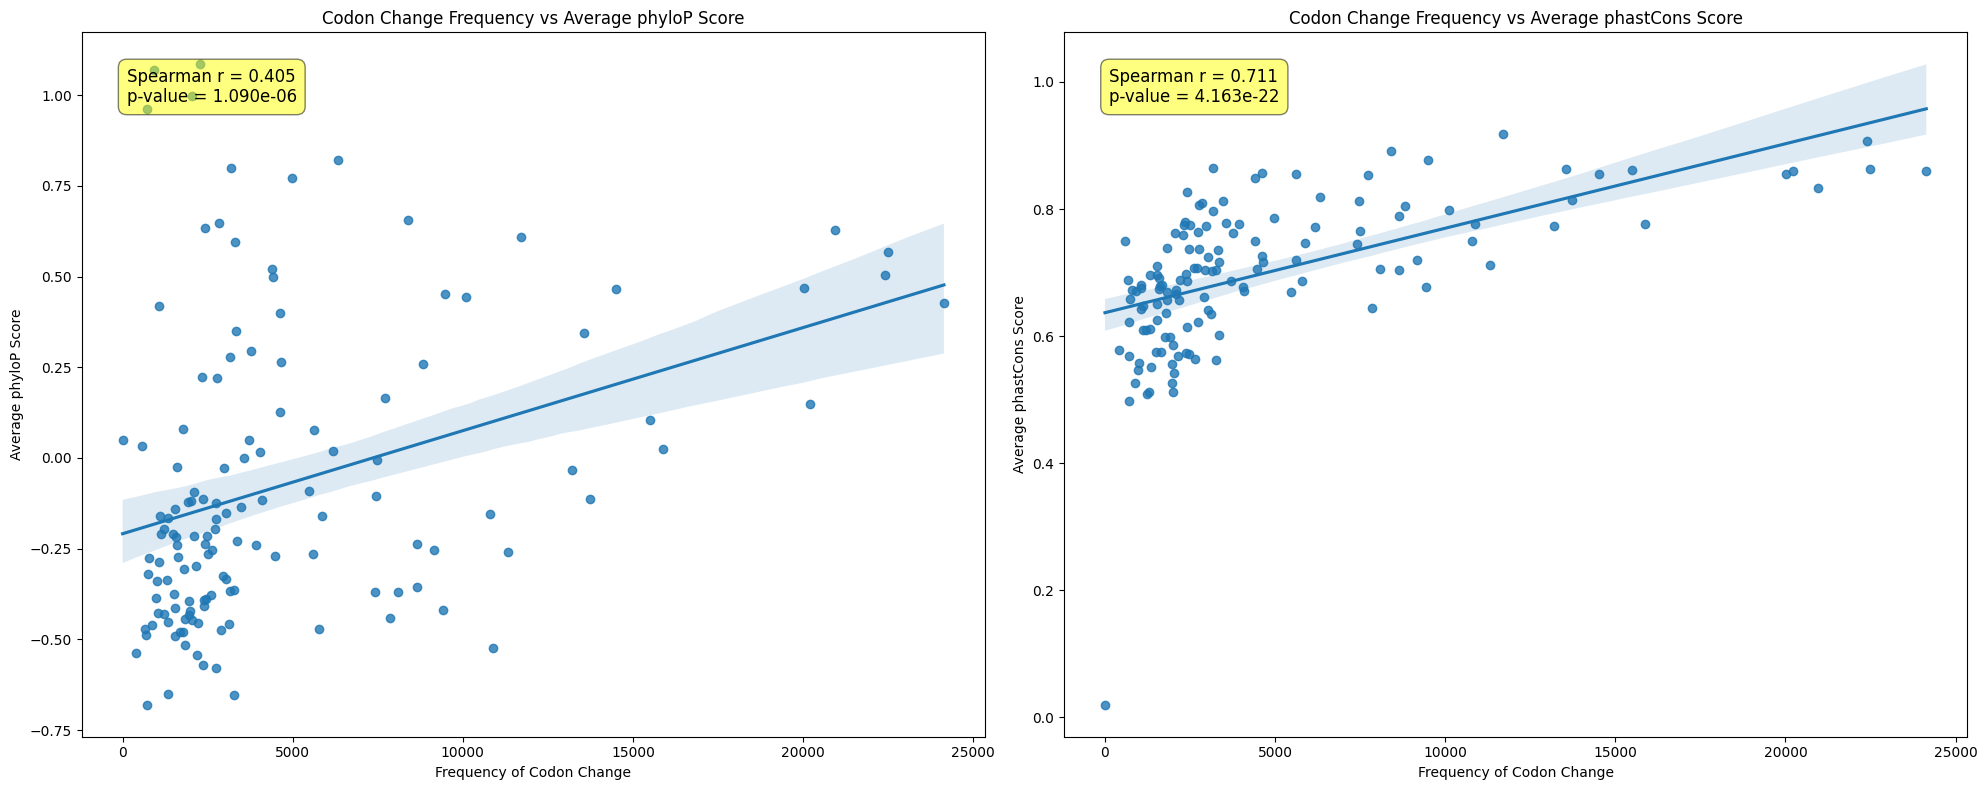

In [26]:
# Make correlation plots
dgrp2_correlation_results = plot_codon_change_frequency_vs_scores(dgrp2_stats, 'dgrp2')

dpgp3_correlation_results = plot_codon_change_frequency_vs_scores(dpgp3_stats, 'dpgp3')

In [28]:
# Sort the DataFrame by phyloP and phastCons scores
dgrp2_avg_phylop = dgrp2_stats.sort_values('phyloP', ascending=False)
dgrp2_avg_phastcons = dgrp2_stats.sort_values('phastCons', ascending=False)

# Sort the DataFrame by phyloP and phastCons scores
dpgp3_avg_phylop = dpgp3_stats.sort_values('phyloP', ascending=False)
dpgp3_avg_phastcons = dpgp3_stats.sort_values('phastCons', ascending=False)

Plot saved as ../exploratory/dgrp2_phyloP_plot_20240625_152734.png


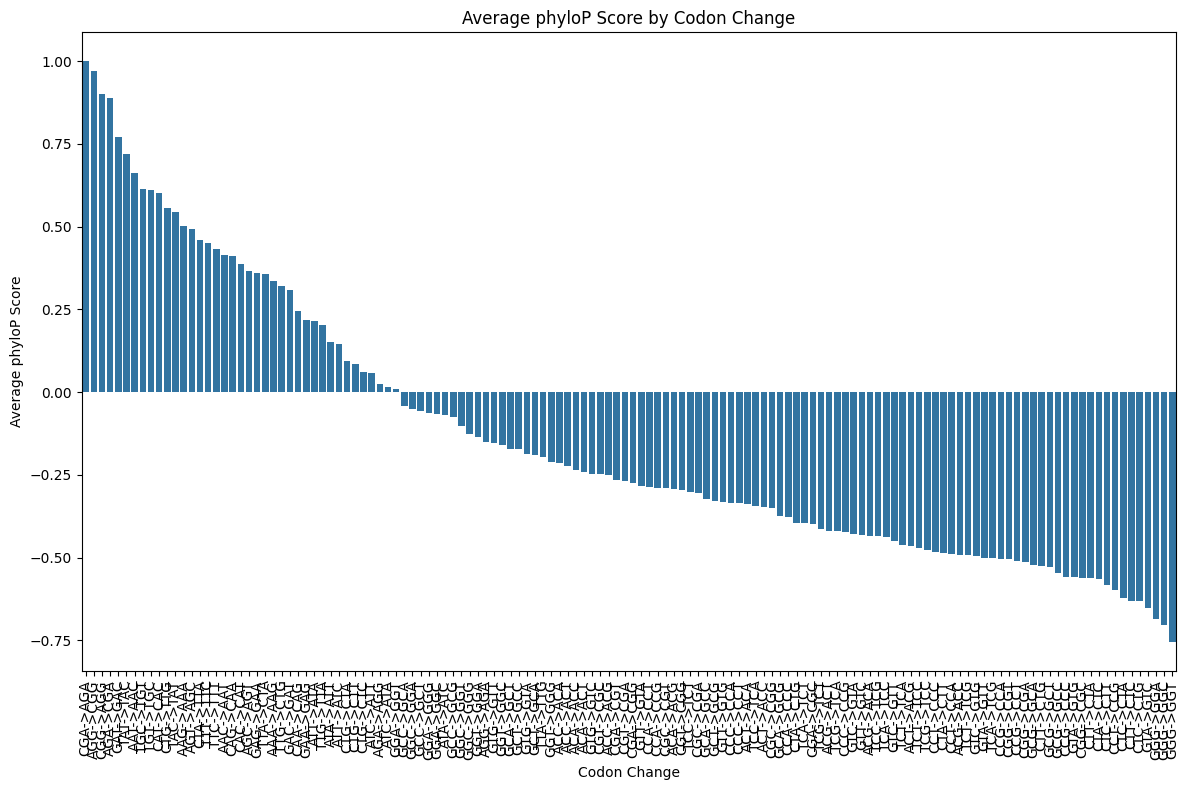

In [29]:
# Plot phyloP scores
plot_scores(dgrp2_avg_phylop, 'phyloP', 'dgrp2')

Plot saved as ../exploratory/dgrp2_phastCons_plot_20240625_152806.png


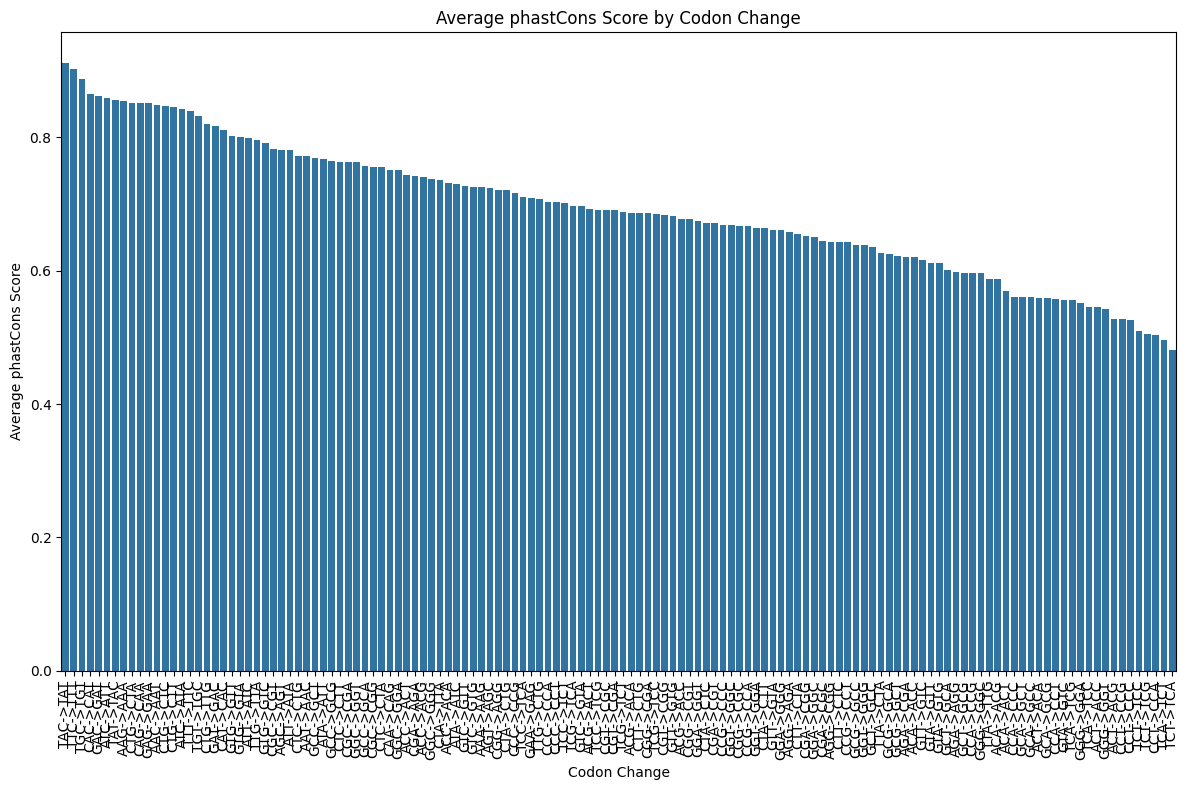

In [30]:
# Plot phastCons scores
plot_scores(dgrp2_avg_phastcons, 'phastCons', 'dgrp2')

Plot saved as ../exploratory/dpgp3_phyloP_plot_20240625_155405.png


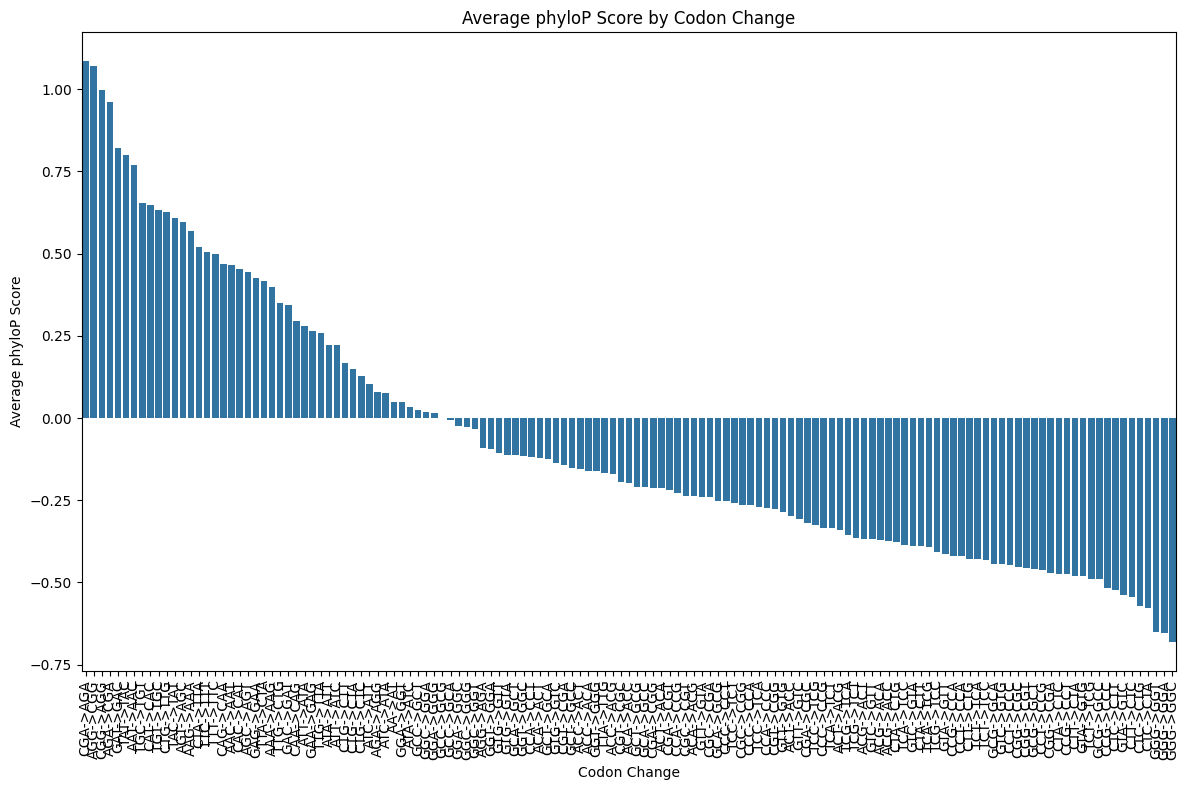

Plot saved as ../exploratory/dpgp3_phastCons_plot_20240625_155406.png


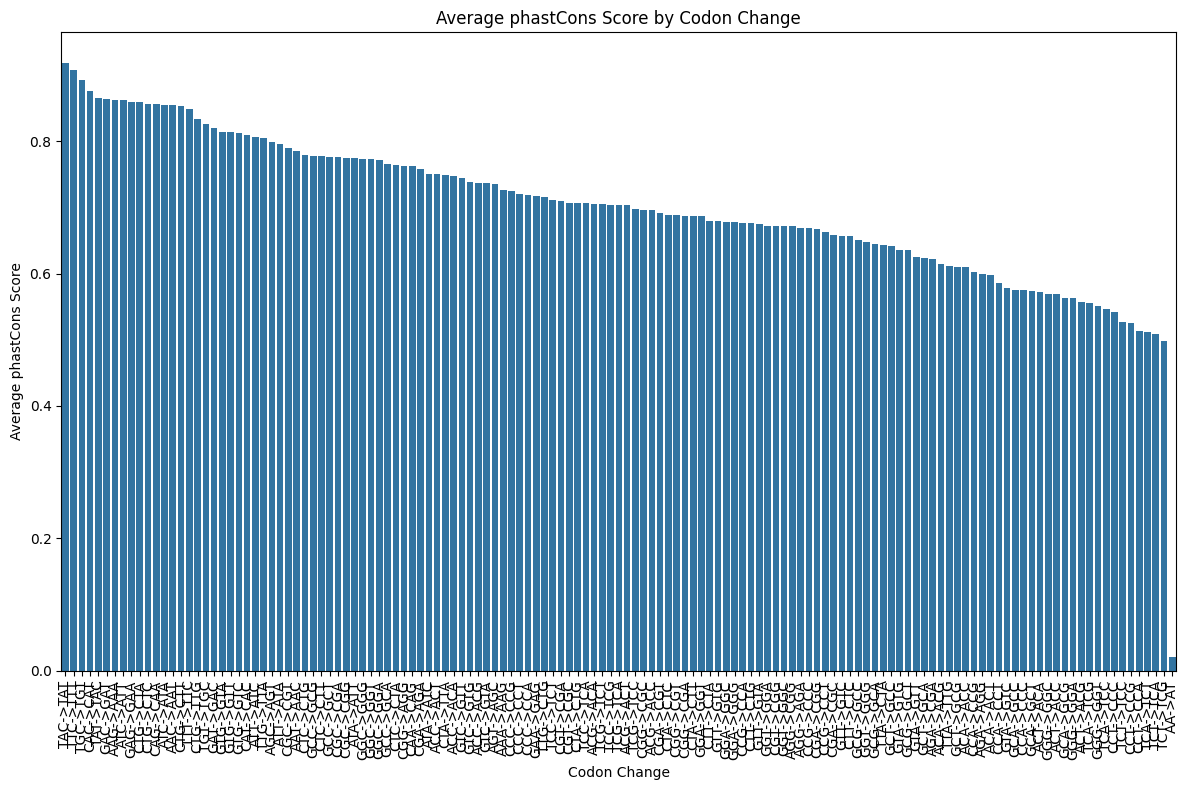

In [31]:
plot_scores(dpgp3_avg_phylop, 'phyloP', 'dpgp3')
plot_scores(dpgp3_avg_phastcons, 'phastCons', 'dpgp3')

In [32]:
def score_histogram(data: DataFrame, score: str) -> None:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[score], kde=True)
    plt.xlabel(f'{score} Score')
    plt.ylabel('Count')
    plt.title(f'Distribution of {score} Scores for Synonymous Mutations')
    plt.show()